<a href="https://colab.research.google.com/github/Rad-Monk/Code/blob/main/LP_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install "tensorflow-text==2.13.*"

In [ ]:
import collections
import pathlib

import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import utils
from tensorflow.keras.layers import TextVectorization

import tensorflow_datasets as tfds
import tensorflow_text as tf_text

In [ ]:
data_url = 'https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz'

dataset_dir = tf.keras.utils.get_file(
    origin = data_url,
    untar = True,
    cache_dir = 'stack_overflow',
    cache_subdir = ''
)

dataset_dir = pathlib.Path(dataset_dir).parent

6053168/6053168 [==============================] - 0s 0us/step


In [ ]:
list(dataset_dir.iterdir())

[PosixPath('/tmp/.keras/test'),
 PosixPath('/tmp/.keras/stack_overflow_16k.tar.gz'),
 PosixPath('/tmp/.keras/train'),
 PosixPath('/tmp/.keras/README.md')]

In [ ]:
train_dir = dataset_dir/'train'
list(train_dir.iterdir())

[PosixPath('/tmp/.keras/train/java'),
 PosixPath('/tmp/.keras/train/python'),
 PosixPath('/tmp/.keras/train/csharp'),
 PosixPath('/tmp/.keras/train/javascript')]

In [ ]:
sample_file = train_dir/'python/1755.txt'
with open(sample_file) as f:
  print(f.read())

why does this blank program print true x=true.def stupid():.    x=false.stupid().print x



In [ ]:
batch_size = 32
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    train_dir,
    batch_size = batch_size,
    validation_split = .2,
    seed = seed,
    subset = 'training'
)

raw_val_ds = tf.keras.utils.text_dataset_from_directory(
    train_dir,
    batch_size = batch_size,
    validation_split = .2,
    seed= seed,
    subset = 'validation'
)

Found 8000 files belonging to 4 classes.
Using 6400 files for training.
Found 8000 files belonging to 4 classes.
Using 1600 files for validation.


In [ ]:
for text_batch,label_batch in raw_train_ds.take(1):
  for i in range(10):
    print(f'text: {text_batch.numpy()[i]}')
    print(f'label: {label_batch.numpy()[i]}')

text: b'"my tester is going to the wrong constructor i am new to programming so if i ask a question that can be easily fixed, please forgive me. my program has a tester class with a main. when i send that to my regularpolygon class, it sends it to the wrong constructor. i have two constructors. 1 without perameters..public regularpolygon().    {.       mynumsides = 5;.       mysidelength = 30;.    }//end default constructor...and my second, with perameters. ..public regularpolygon(int numsides, double sidelength).    {.        mynumsides = numsides;.        mysidelength = sidelength;.    }// end constructor...in my tester class i have these two lines:..regularpolygon shape = new regularpolygon(numsides, sidelength);.        shape.menu();...numsides and sidelength were declared and initialized earlier in the testing class...so what i want to happen, is the tester class sends numsides and sidelength to the second constructor and use it in that class. but it only uses the default construc

In [ ]:
for i,label in enumerate(raw_train_ds.class_names):
  print(f'label {i}: {label}')

label 0: csharp
label 1: java
label 2: javascript
label 3: python


In [ ]:
test_dir = dataset_dir/'test'
raw_test_dir = tf.keras.utils.text_dataset_from_directory(
    test_dir,
    batch_size = batch_size
)

Found 8000 files belonging to 4 classes.


In [ ]:
Autotune = tf.data.AUTOTUNE

raw_train_ds = raw_train_ds.cache().prefetch(buffer_size = Autotune)
raw_val_ds = raw_val_ds.cache().prefetch(buffer_size = Autotune)
raw_test_ds = raw_test_dir.cache().prefetch(buffer_size = Autotune)

In [ ]:
VOCAB_SIZE = 10000
MAX_SEQUENCE_LENGTH = 250

binary_vectorizer = TextVectorization(
    max_tokens = VOCAB_SIZE,
    output_mode = 'binary'
)

int_vectorizer = TextVectorization(
    max_tokens = VOCAB_SIZE,
    output_sequence_length = MAX_SEQUENCE_LENGTH,
    output_mode = 'int'
)

In [ ]:
train_text= raw_train_ds.map(lambda text, label: text)
binary_vectorizer.adapt(train_text)
int_vectorizer.adapt(train_text)

In [ ]:
text_batch, label_batch = next(iter(raw_train_ds))
first_question, first_label = text_batch.[0], label_batch[0]
print(f'Question: {first_question}')
print(f'Label: {first_label}')
print(f'Vectorized question: {int_vectorizer([first_question])}')

Question: b'"unit testing of setters and getters teacher wanted us to do a comprehensive unit test. for me, this will be the first time that i use junit. i am confused about testing set and get methods. do you think should i test them? if the answer is yes; is this code enough for testing?..  public void testsetandget(){.    int a = 10;.    class firstclass = new class();.    firstclass.setvalue(10);.    int value = firstclass.getvalue();.    assert.asserttrue(""error"", value==a);.  }...in my code, i think if there is an error, we can\'t know that the error is deriving because of setter or getter."\n'
Label: 1
Vectorized question: [[1011  773    9 2456    8 1863 2362  690 1267    4   40    5    1 1011
   196   12   74   13   72   33    2   98  105   14    3   70 9611    3
    34  888  202  773  107    8   41  242   40   58  291   90    3  196
   191   10    2  182    6  668    6   13   30 1187   12  773   22   42
     1   28    5  140   29 5213   15   29    1   28   51    1    1    1


'binary' vectorized question: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,

(0.0, 1000.0)

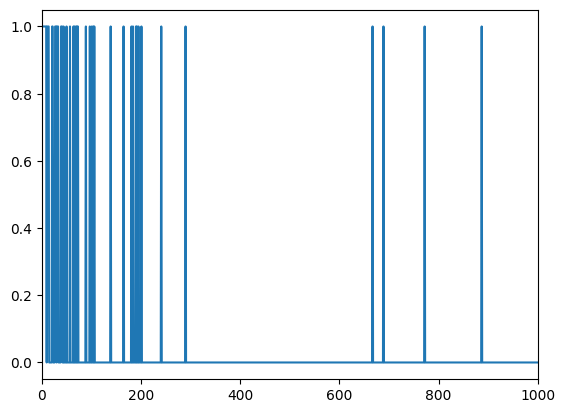

In [ ]:
print("'binary' vectorized question:",
      list(binary_vectorizer(first_question).numpy()))

plt.plot(binary_vectorizer(first_question).numpy())
plt.xlim(0,1000)

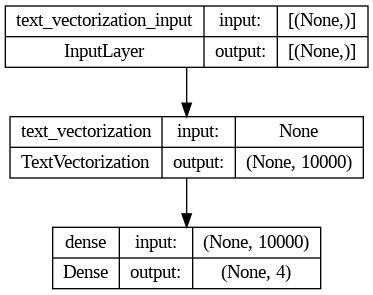

In [ ]:
binary_model = tf.keras.Sequential([
    binary_vectorizer,
    layers.Dense(4)])

binary_model.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy'])

tf.keras.utils.plot_model(binary_model, show_shapes=True)

In [ ]:
bin_history = binary_model.fit(
    raw_train_ds, validation_data=raw_val_ds, epochs=10)

print()

Epoch 1/10
200/200 [==============================] - 5s 18ms/step - loss: 1.1218 - accuracy: 0.6455 - val_loss: 0.9169 - val_accuracy: 0.7781
Epoch 2/10
200/200 [==============================] - 1s 7ms/step - loss: 0.7808 - accuracy: 0.8166 - val_loss: 0.7523 - val_accuracy: 0.7994
Epoch 3/10
200/200 [==============================] - 1s 7ms/step - loss: 0.6289 - accuracy: 0.8583 - val_loss: 0.6661 - val_accuracy: 0.8200
Epoch 4/10
200/200 [==============================] - 1s 7ms/step - loss: 0.5352 - accuracy: 0.8855 - val_loss: 0.6121 - val_accuracy: 0.8231
Epoch 5/10
200/200 [==============================] - 1s 7ms/step - loss: 0.4689 - accuracy: 0.9056 - val_loss: 0.5751 - val_accuracy: 0.8325
Epoch 6/10
200/200 [==============================] - 1s 7ms/step - loss: 0.4185 - accuracy: 0.9180 - val_loss: 0.5482 - val_accuracy: 0.8313
Epoch 7/10
200/200 [==============================] - 2s 11ms/step - loss: 0.3781 - accuracy: 0.9294 - val_loss: 0.5280 - val_accuracy: 0.8356
Epoc

In [ ]:
def create_model(vocab_size, num_labels, vectorizer=None):
  my_layers =[]
  if vectorizer is not None:
    my_layers = [vectorizer]

  my_layers.extend([
      layers.Embedding(vocab_size, 64, mask_zero=True),
      layers.Dropout(0.5),
      layers.Conv1D(64, 5, padding="valid", activation="relu", strides=2),
      layers.GlobalMaxPooling1D(),
      layers.Dense(num_labels)
  ])

  model = tf.keras.Sequential(my_layers)
  return model

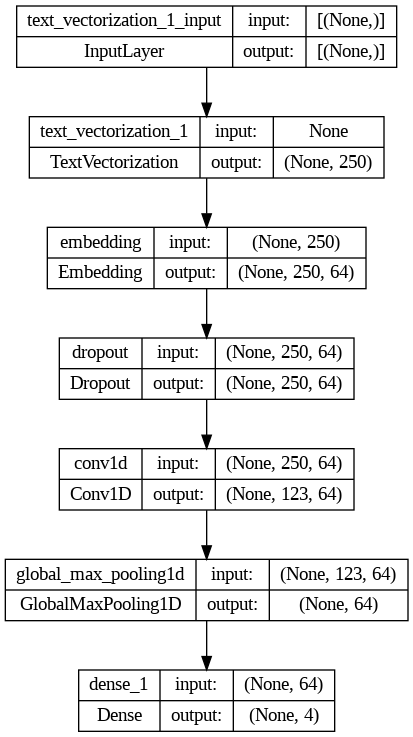

In [ ]:
# `vocab_size` is `VOCAB_SIZE + 1` since `0` is used additionally for padding.
int_model = create_model(vocab_size=VOCAB_SIZE + 1, num_labels=4, vectorizer=int_vectorizer)

tf.keras.utils.plot_model(int_model, show_shapes=True)

In [ ]:
int_model.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy'])
int_history = int_model.fit(raw_train_ds, validation_data=raw_val_ds, epochs=10)

Epoch 1/10
200/200 [==============================] - 10s 43ms/step - loss: 1.2599 - accuracy: 0.4128 - val_loss: 0.9474 - val_accuracy: 0.5969
Epoch 2/10
200/200 [==============================] - 8s 40ms/step - loss: 0.8068 - accuracy: 0.6600 - val_loss: 0.6417 - val_accuracy: 0.7575
Epoch 3/10
200/200 [==============================] - 8s 40ms/step - loss: 0.5794 - accuracy: 0.7739 - val_loss: 0.5500 - val_accuracy: 0.7912
Epoch 4/10
200/200 [==============================] - 8s 40ms/step - loss: 0.4271 - accuracy: 0.8528 - val_loss: 0.5045 - val_accuracy: 0.8069
Epoch 5/10
200/200 [==============================] - 8s 40ms/step - loss: 0.3120 - accuracy: 0.9016 - val_loss: 0.4845 - val_accuracy: 0.8144
Epoch 6/10
200/200 [==============================] - 8s 42ms/step - loss: 0.2200 - accuracy: 0.9384 - val_loss: 0.4886 - val_accuracy: 0.8181
Epoch 7/10
200/200 [==============================] - 11s 55ms/step - loss: 0.1616 - accuracy: 0.9550 - val_loss: 0.5101 - val_accuracy: 0.81

Text(0, 0.5, 'CE/token')

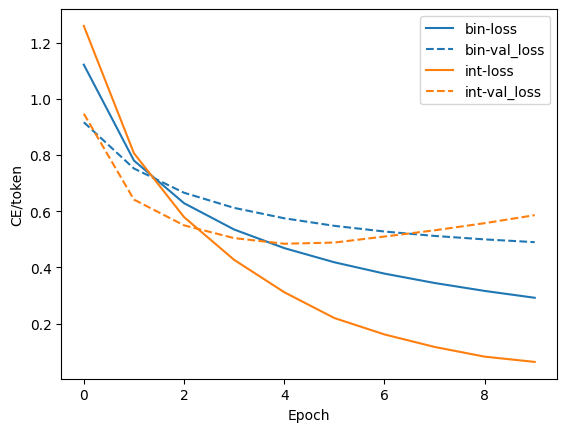

In [ ]:
loss = plt.plot(bin_history.epoch, bin_history.history['loss'], label='bin-loss')
plt.plot(bin_history.epoch, bin_history.history['val_loss'], '--', color=loss[0].get_color(), label='bin-val_loss')

loss = plt.plot(int_history.epoch, int_history.history['loss'], label='int-loss')
plt.plot(int_history.epoch, int_history.history['val_loss'], '--', color=loss[0].get_color(), label='int-val_loss')

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('CE/token')

In [ ]:
binary_train_ds = raw_train_ds.map(lambda x,y: (binary_vectorizer(x), y))
binary_val_ds = raw_val_ds.map(lambda x,y: (binary_vectorizer(x), y))
binary_test_ds = raw_test_ds.map(lambda x,y: (binary_vectorizer(x), y))

int_train_ds = raw_train_ds.map(lambda x,y: (int_vectorizer(x), y))
int_val_ds = raw_val_ds.map(lambda x,y: (int_vectorizer(x), y))
int_test_ds = raw_test_ds.map(lambda x,y: (int_vectorizer(x), y))

In [ ]:
binary_model.export('bin.tf')

Saved artifact at 'bin.tf'. The following endpoints are available:

* Endpoint 'serve'
  Args:
    args_0: string Tensor, shape=(None,)
  Returns:
    float32 Tensor, shape=(None, 4)


In [ ]:
loaded = tf.saved_model.load('bin.tf')

In [ ]:
binary_model.predict(['How do you sort a list?'])

1/1 [==============================] - 0s 244ms/step


array([[-0.1521725 , -0.01482045, -0.63216084,  0.36627358]],
      dtype=float32)

In [ ]:
loaded.serve(tf.constant(['How do you sort a list?'])).numpy()

array([[-0.1521725 , -0.01482045, -0.63216084,  0.36627358]],
      dtype=float32)

In [ ]:
DIRECTORY_URL = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/'
FILE_NAMES = ['cowper.txt', 'derby.txt', 'butler.txt']

for name in FILE_NAMES:
  text_dir = utils.get_file(name, origin=DIRECTORY_URL + name)

parent_dir = pathlib.Path(text_dir).parent
list(parent_dir.iterdir())

807992/807992 [==============================] - 0s 0us/step


[PosixPath('/root/.keras/datasets/derby.txt'),
 PosixPath('/root/.keras/datasets/butler.txt'),
 PosixPath('/root/.keras/datasets/cowper.txt')]

In [ ]:
def labeler(text, index):
  return text, tf.cast(index, tf.int64)

In [ ]:
labeled_data_sets = []

for i, file_name in enumerate(FILE_NAMES):
  lines_dataset = tf.data.TextLineDataset(parent_dir/file_name)
  labeled_dataset = lines_dataset.map(lambda ex: labeler(ex, i))
  labeled_data_sets.append(labeled_dataset)

In [ ]:
BUFFER_SIZE = 50000
BATCH_SIZE = 64
VALIDATION_SIZE = 5000

In [ ]:
all_labeled_data = labeled_data_sets[0]
for labeled_data in labeled_data_sets[1:]:
  all_labeled_data.concatenate(labeled_data)

all_labeled_data = all_labeled_data.shuffle(
    BUFFER_SIZE, reshuffle_each_iteration = False
)


In [ ]:
for text, label in all_labeled_data.take(2):
  print(f'text: {text.numpy()}')
  print(f'label: {label}')

text: b'Lay gasping life away. But he who gave'
label: 0
text: b"I fled for refuge. So the Thunderer cool'd,"
label: 0


In [ ]:
class MyTokenizer(tf.keras.layers.Layer):
  def __init__(self):
    super().__init__()
    self.tokenizer = tf_text.UnicodeScriptTokenizer()

  def call(self,text):
    lower_case = tf_text.case_fold_utf8(text)
    result = self.tokenizer.tokenize(lower_case)
    if isinstance(result, tf.RaggedTensor):
      result = result.to_tensor()
    return result

In [ ]:
tokenizer = MyTokenizer()

In [ ]:
tokenized_ds = all_labeled_data.map(lambda text, label: (tokenizer(text), label))

In [ ]:
for tokens, label in tokenized_ds.take(1):
  print(f'tokens: {tokens}')
  print(f'label: {label}')

tokens: [b'lay' b'gasping' b'life' b'away' b'.' b'but' b'he' b'who' b'gave']
label: 0


In [ ]:
tokenized_ds = tokenized_ds.cache().prefetch(buffer_size = Autotune)

vocab_count = collections.Counter()
for tokens, label in tokenized_ds.ragged_batch(1000):
  tokens = tf.reshape(tokens, [-1])
  for tok in tokens.numpy():
    vocab_count[tok] += 1

vocab = [tok for tok,label in vocab_count.most_common(VOCAB_SIZE)]


In [ ]:
class MyVocabTable(tf.keras.layers.Layer):
  def __init__(self, vocab):
    super().__init__()
    self.keys = [''] + vocab
    self.values = range(len(self.keys))

    self.init = tf.lookup.KeyValueTensorInitializer(
        self.keys, self.values, key_dtype=tf.string, value_dtype=tf.int64)

    num_oov_buckets = 1

    self.table = tf.lookup.StaticVocabularyTable(self.init, num_oov_buckets)

  def call(self, x):
    result = self.table.lookup(x)
    return result

In [ ]:
vocab_table = MyVocabTable(vocab)

In [ ]:
preprocess_text = tf.keras.Sequential([
    tokenizer,
    vocab_table
])

In [ ]:
example_text, example_label = next(iter(all_labeled_data))
print("Sentence: ", example_text.numpy())
vectorized_text = preprocess_text(example_text)
print("Vectorized sentence: ", vectorized_text.numpy())

Sentence:  b'Lay gasping life away. But he who gave'
Vectorized sentence:  [ 302 3479  279  263    3   16   11   49  230]


In [ ]:
all_encoded_data = all_labeled_data.map(lambda text, labels:(preprocess_text(text), labels))

for ids, label in all_encoded_data.take(1):
  break

print("Ids: ", ids.numpy())
print("Label: ", label.numpy())

Ids:  [ 302 3479  279  263    3   16   11   49  230]
Label:  0


In [ ]:
train_data = all_encoded_data.skip(VALIDATION_SIZE).shuffle(BUFFER_SIZE).padded_batch(BATCH_SIZE)
validation_data = all_encoded_data.take(VALIDATION_SIZE).padded_batch(BATCH_SIZE)

In [ ]:
sample_text, sample_labels = next(iter(validation_data))
print("Text batch shape: ", sample_text.shape)
print("Label batch shape: ", sample_labels.shape)
print("First text example: ", sample_text[0])
print("First label example: ", sample_labels[0])

Text batch shape:  (64, 16)
Label batch shape:  (64,)
First text example:  tf.Tensor(
[ 302 3479  279  263    3   16   11   49  230    0    0    0    0    0
    0    0], shape=(16,), dtype=int64)
First label example:  tf.Tensor(0, shape=(), dtype=int64)


In [ ]:
train_data = train_data.prefetch(tf.data.AUTOTUNE)
validation_data = validation_data.prefetch(tf.data.AUTOTUNE)

In [ ]:
model = create_model(vocab_size=VOCAB_SIZE+2, num_labels=3)

model.compile(
    optimizer='adam',
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

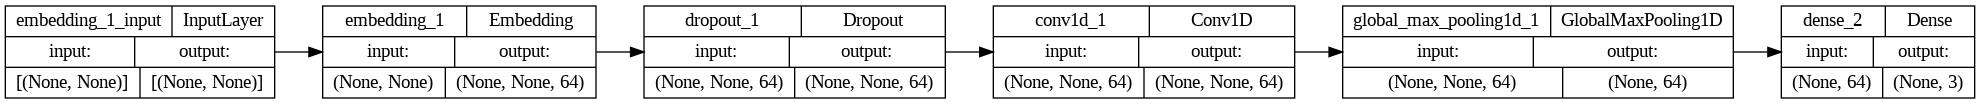

In [ ]:
tf.keras.utils.plot_model(model,rankdir = 'LR', show_shapes=True)

In [ ]:
history = model.fit(train_data, validation_data=validation_data, epochs=3)

Epoch 1/3
221/221 [==============================] - 32s 48ms/step - loss: 0.0814 - accuracy: 0.9996 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 2/3
221/221 [==============================] - 27s 52ms/step - loss: 4.2464e-04 - accuracy: 1.0000 - val_loss: 3.7285e-04 - val_accuracy: 1.0000
Epoch 3/3
221/221 [==============================] - 28s 37ms/step - loss: 1.5956e-04 - accuracy: 1.0000 - val_loss: 1.7991e-04 - val_accuracy: 1.0000


In [ ]:
metrics = model.evaluate(validation_data, return_dict=True)

print("Loss: ", metrics['loss'])
print("Accuracy: {:2.2%}".format(metrics['accuracy']))

79/79 [==============================] - 9s 76ms/step - loss: 1.7991e-04 - accuracy: 1.0000
Loss:  0.00017991237109526992
Accuracy: 100.00%


In [ ]:
export_model = tf.keras.Sequential([
    preprocess_text,
    model
])

In [ ]:
export_model.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer='adam',
    metrics=['accuracy'])

In [ ]:
# Create a test dataset of raw strings.
test_ds = all_labeled_data.take(VALIDATION_SIZE).batch(BATCH_SIZE)
test_ds = test_ds.cache().prefetch(tf.data.AUTOTUNE)
test_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
loss, accuracy = export_model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: {:2.2%}".format(accuracy))

79/79 [==============================] - 10s 15ms/step - loss: 2.3842e-07 - accuracy: 1.0000
Loss:  2.3841855067985307e-07
Accuracy: 100.00%


In [ ]:
tf.saved_model.save(export_model, 'export.tf')

In [ ]:
loaded = tf.saved_model.load('export.tf')

In [ ]:
export_model(tf.constant(['The field bristled with the long and deadly spears which they bore.'])).numpy()

array([[ 3.691852 , -2.6671627, -2.3356407]], dtype=float32)

In [ ]:
loaded(tf.constant(['The field bristled with the long and deadly spears which they bore.'])).numpy()

array([[ 3.691852 , -2.6671627, -2.3356407]], dtype=float32)

In [ ]:
inputs = [
    "Join'd to th' Ionians with their flowing robes,",  # Label: 1
    "the allies, and his armour flashed about him so that he seemed to all",  # Label: 2
    "And with loud clangor of his arms he fell.",  # Label: 0
]

predicted_scores = export_model.predict(inputs)
predicted_labels = tf.math.argmax(predicted_scores, axis=1)

for input, label in zip(inputs, predicted_labels):
  print("Question: ", input)
  print("Predicted label: ", label.numpy())

1/1 [==============================] - 4s 4s/step
Question:  Join'd to th' Ionians with their flowing robes,
Predicted label:  0
Question:  the allies, and his armour flashed about him so that he seemed to all
Predicted label:  0
Question:  And with loud clangor of his arms he fell.
Predicted label:  0


In [ ]:
  # Training set.
train_ds = tfds.load(
    'imdb_reviews',
    split='train[:80%]',
    batch_size=BATCH_SIZE,
    shuffle_files=True,
    as_supervised=True)

In [ ]:
# Validation set.
val_ds = tfds.load(
    'imdb_reviews',
    split='train[80%:]',
    batch_size=BATCH_SIZE,
    shuffle_files=True,
    as_supervised=True)

In [ ]:
for review_batch, label_batch in val_ds.take(1):
  for i in range(5):
    print("Review: ", review_batch[i].numpy())
    print("Label: ", label_batch[i].numpy())

Review:  b"Instead, go to the zoo, buy some peanuts and feed 'em to the monkeys. Monkeys are funny. People with amnesia who don't say much, just sit there with vacant eyes are not all that funny.<br /><br />Black comedy? There isn't a black person in it, and there isn't one funny thing in it either.<br /><br />Walmart buys these things up somehow and puts them on their dollar rack. It's labeled Unrated. I think they took out the topless scene. They may have taken out other stuff too, who knows? All we know is that whatever they took out, isn't there any more.<br /><br />The acting seemed OK to me. There's a lot of unfathomables tho. It's supposed to be a city? It's supposed to be a big lake? If it's so hot in the church people are fanning themselves, why are they all wearing coats?"
Label:  0
Review:  b'Well, was Morgan Freeman any more unusual as God than George Burns? This film sure was better than that bore, "Oh, God". I was totally engrossed and LMAO all the way through. Carrey was

In [ ]:
vectorize_layer = TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode='int',
    output_sequence_length=MAX_SEQUENCE_LENGTH)

# Make a text-only dataset (without labels), then call `TextVectorization.adapt`.
train_text = train_ds.map(lambda text, labels: text)
vectorize_layer.adapt(train_text)

In [ ]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [ ]:
train_ds = train_ds.map(vectorize_text)
val_ds = val_ds.map(vectorize_text)

In [ ]:
# Configure datasets for performance as before.
train_ds = train_ds.cache().prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(tf.data.AUTOTUNE)

In [ ]:
model = create_model(vocab_size=VOCAB_SIZE, num_labels=1)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 64)          640000    
                                                                 
 dropout_3 (Dropout)         (None, None, 64)          0         
                                                                 
 conv1d_3 (Conv1D)           (None, None, 64)          20544     
                                                                 
 global_max_pooling1d_3 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 660609 (2.52 MB)
Trainable params: 660609 (2.52 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
model.compile(
    loss=losses.BinaryCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=3)

Epoch 1/3
313/313 [==============================] - 20s 61ms/step - loss: 0.5876 - accuracy: 0.6281 - val_loss: 0.4334 - val_accuracy: 0.8026
Epoch 2/3
313/313 [==============================] - 17s 54ms/step - loss: 0.3732 - accuracy: 0.8296 - val_loss: 0.3493 - val_accuracy: 0.8494
Epoch 3/3
313/313 [==============================] - 19s 59ms/step - loss: 0.2856 - accuracy: 0.8785 - val_loss: 0.3304 - val_accuracy: 0.8618


In [ ]:
loss, accuracy = model.evaluate(val_ds)

print("Loss: ", loss)
print("Accuracy: {:2.2%}".format(accuracy))

79/79 [==============================] - 1s 10ms/step - loss: 0.3304 - accuracy: 0.8618
Loss:  0.330432653427124
Accuracy: 86.18%


In [ ]:
export_model = tf.keras.Sequential(
    [vectorize_layer, model,
     layers.Activation('sigmoid')])

export_model.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer='adam',
    metrics=['accuracy'])

In [ ]:
# 0 --> negative review
# 1 --> positive review
inputs = [
    "This is a fantastic movie.",
    "This is a bad movie.",
    "This movie was so bad that it was good.",
    "I will never say yes to watching this movie.",
]

predicted_scores = export_model.predict(inputs)
predicted_labels = [int(round(x[0])) for x in predicted_scores]

for input, label in zip(inputs, predicted_labels):
  print("Question: ", input)
  print("Predicted label: ", label)

1/1 [==============================] - 0s 136ms/step
Question:  This is a fantastic movie.
Predicted label:  1
Question:  This is a bad movie.
Predicted label:  0
Question:  This movie was so bad that it was good.
Predicted label:  0
Question:  I will never say yes to watching this movie.
Predicted label:  1
